# <font color="#ffb703"> Desafio Individual - Correlação e Regressão Simples/Multivariada

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import statsmodels.api as sm

In [ ]:
df_house = pd.read_csv('kc_house_data.csv')

df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_house['date'] = pd.to_datetime(df_house['date'], errors='coerce')

In [ ]:
df_house.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [ ]:
df_house.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.999000e+03,9999,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.549550e+09,2014-10-29 16:44:04.104410368,5.334366e+05,3.361636,2.061806,2053.088209,1.603696e+04,1.432043,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,13359.446945
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.114001e+09,2014-07-22 00:00:00,3.150000e+05,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5417.500000
50%,3.905010e+09,2014-10-16 00:00:00,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7848.000000
75%,7.272001e+09,2015-02-17 12:00:00,6.399500e+05,4.000000,2.500000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,10374.500000
max,9.842301e+09,2015-05-15 00:00:00,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000
std,2.863859e+09,NaN,3.770547e+05,0.916079,0.766884,911.227082,4.504326e+04,0.511869,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,27316.491648


### **Considerando a base de dados kc_house_data.csv responda as questões de 1 a 6 abaixo:**

1. Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço `price` e o número de
quartos `bedrooms`? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total `sqft_living` superior a
2000 pés quadrados?


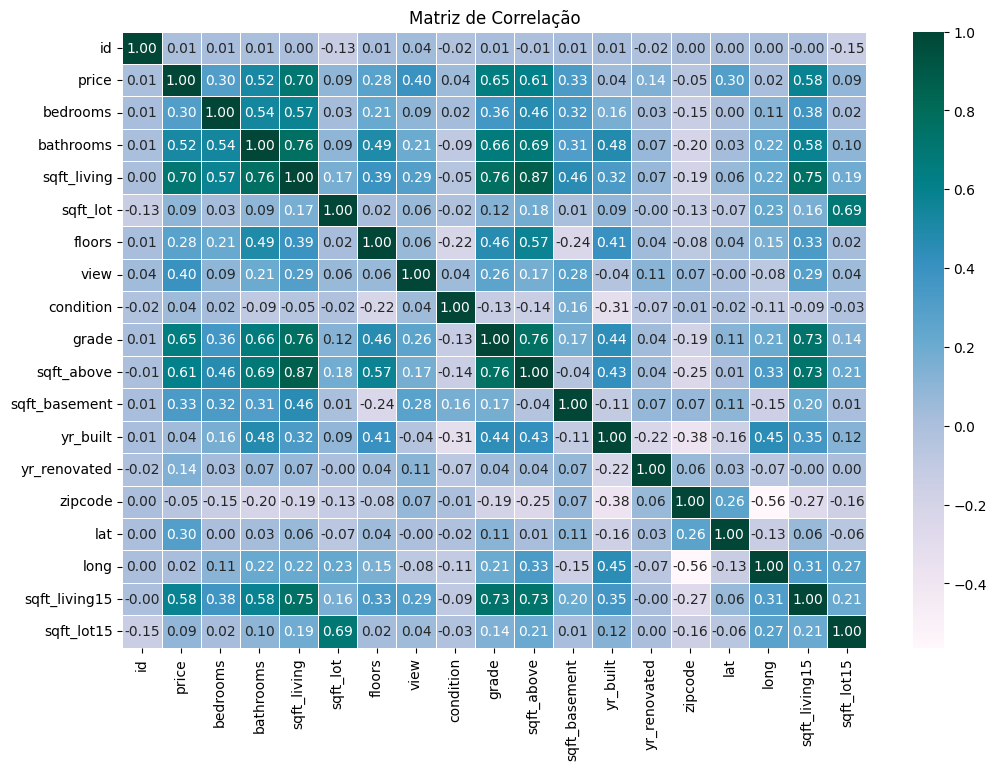

In [ ]:
# Codificando e exibindo a matriz de correlação

house_df = df_house.select_dtypes(include=['float64', 'int64'])

corr = house_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='PuBuGn', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados

area = df_house[df_house['sqft_living'] > 2000]

corr_area = area['bedrooms'].corr(area['price'])

print('Resultado inteiro:', corr_area)
print('Resultado arredondado:', corr_area.round(2))

Resultado inteiro: 0.11912115548964147
Resultado arredondado: 0.12


Observando o gráfico, pode-se dizer que a correlação entre o preço e o número de quartos é de **0.30**, assim firmando uma relação positiva, onde se o número de quartos aumenta o preço também.

Agora, se selecionarmos apenas casas com uma área total superior a 2000 pés quadrados, existe uma diferença no resultado da correlação sendo ela **0.12**, ela continua sendo positiva mas não tão forte quanto a primeira correlação.

2. Existe alguma correlação entre o preço `price` e a área total da casa
`sqft_living`, considerando apenas casas com pelo menos dois
banheiros `bathrooms`?

In [ ]:
banheiros = df_house[df_house['bathrooms'] >= 2]

corr_banheiros = banheiros['sqft_living'].corr(banheiros['price'])
print('Resultado inteiro:', corr_banheiros)
print('Resultado arredondado:', corr_banheiros.round(2))

Resultado inteiro: 0.7067107107996192
Resultado arredondado: 0.71


Existe uma forte correlação positiva entre o preço e a área total da casa, considerando apenas casas com dois banheiros, com um resultado de **0.71** pode-se dizer que nessa correlação se a área total da casa (com apenas dois banheiros) aumentar logo o preço aumentará também.

3. Como a quantidade de banheiros `bathrooms` influencia na correlação
entre a área total da casa `sqft_living` e o preço `price`?

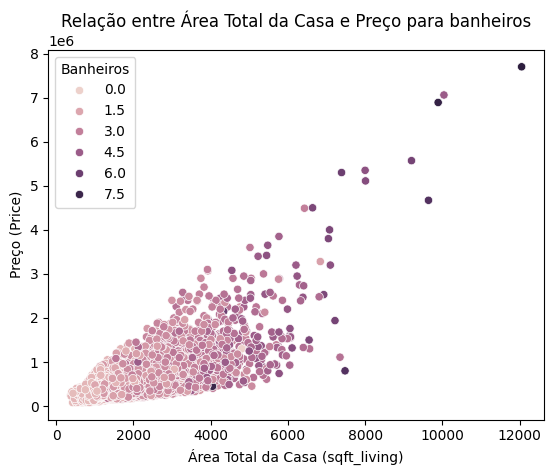

In [ ]:
sns.scatterplot(x='sqft_living', y='price', data=df_house, hue='bathrooms')
plt.xlabel('Área Total da Casa (sqft_living)')
plt.ylabel('Preço (Price)')
plt.title('Relação entre Área Total da Casa e Preço para banheiros')
plt.legend(title='Banheiros')
plt.show()

O gráfico mostra um scatterplot da área total da casa (X) em relação ao preço (y), com cada ponto representando uma casa no conjunto de dados. As casas são coloridas de acordo com a quantidade de banheiros que possuem.

No geral há uma tendência de aumento do preço conforme a área total da casa aumenta. Agora, dividindo em subgrupos com base na quantidade de banheiros, podemos observar:

- Quanto mais banheiros em uma casa menor a quantidade será, isso pode ser relacionado ao preço também pois a parcela de pessoas que pode comprar uma casa com uma quantidade elevada de banheiros é pequena;
- É possível notar que casas entre 1.5 a 4.5 banheiros apresentam uma correlação maior e forte entre a área total e o preço.

4. Qual é a relação entre a condição da casa `condition` e o preço `price`,
considerando apenas casas com uma área total `sqft_living` superior a
3000 pés quadrados?


In [ ]:
area_3000 = df_house[df_house['sqft_living'] > 3000]

corr_3000 = area_3000['condition'].corr(area_3000['price'])
print('Resultado inteiro:', corr_3000)
print('Resultado arredondado:', corr_3000.round(2))

Resultado inteiro: 0.10527844723732609
Resultado arredondado: 0.11


A relação entre a condição da casa e o preço, considerando apenas casas com uma área total superior a 3000 pés quadrados é de **0.11**, logo existe uma relação positiva porém fraca.

5. Existe alguma correlação entre a localização geográfica `lat e long` e o
preço `price` para casas com pelo menos três quartos `bedrooms`?

In [ ]:
tres_quartos = df_house[df_house['bedrooms'] >= 3]

corr_lat = tres_quartos['lat'].corr(tres_quartos['price'])
corr_long = tres_quartos['long'].corr(tres_quartos['price'])

print('Resultados entre Latitude e Preço:')
print('Inteiro:', corr_lat)
print('Arredondado:', corr_lat.round(2))
print('\n')
print('Resultados entre Longitude e Preço:')
print('Inteiro:', corr_long)
print('Arredondado:', corr_long.round(2))

Resultados entre Latitude e Preço:
Inteiro: 0.31255514248432165
Arredondado: 0.31


Resultados entre Longitude e Preço:
Inteiro: -0.0072753069929269365
Arredondado: -0.01


A correlação entre a Latitude e o Preço (para casas com pelos menos 3 quartos) é de **0.31**, sendo positiva.

Já a correção entre a Longitude e o Preço (para casas com pelos menos 3 quartos) é de **-0.01**, sendo negativa.

6. Calcule a correlação entre uma variável categórica `(waterfront)` e uma variável numérica `(price)` usando ANOVA.


In [ ]:
groups = [df_house[df_house['waterfront'] == value]['price'] for value in df_house['waterfront'].unique()]

f_statistic, p_value = f_oneway(*groups)

alpha = 0.05

if p_value < alpha:
  print('Rejeitamos a hipótese nula')
else:
  print('Não rejeitamos a hipótese nula')

Rejeitamos a hipótese nula


- A hipótese nula (H0) em ANOVA afirma que não há diferença significativa entre as médias dos grupos.
- A hipótese alternativa (H1) afirma que há pelo menos uma diferença significativa entre as médias dos grupos.



### **Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:**

7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.


In [ ]:
df_car = pd.read_csv('car_price.csv')
df_car.head(3)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0


In [ ]:
df_car.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

In [ ]:
df_car.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


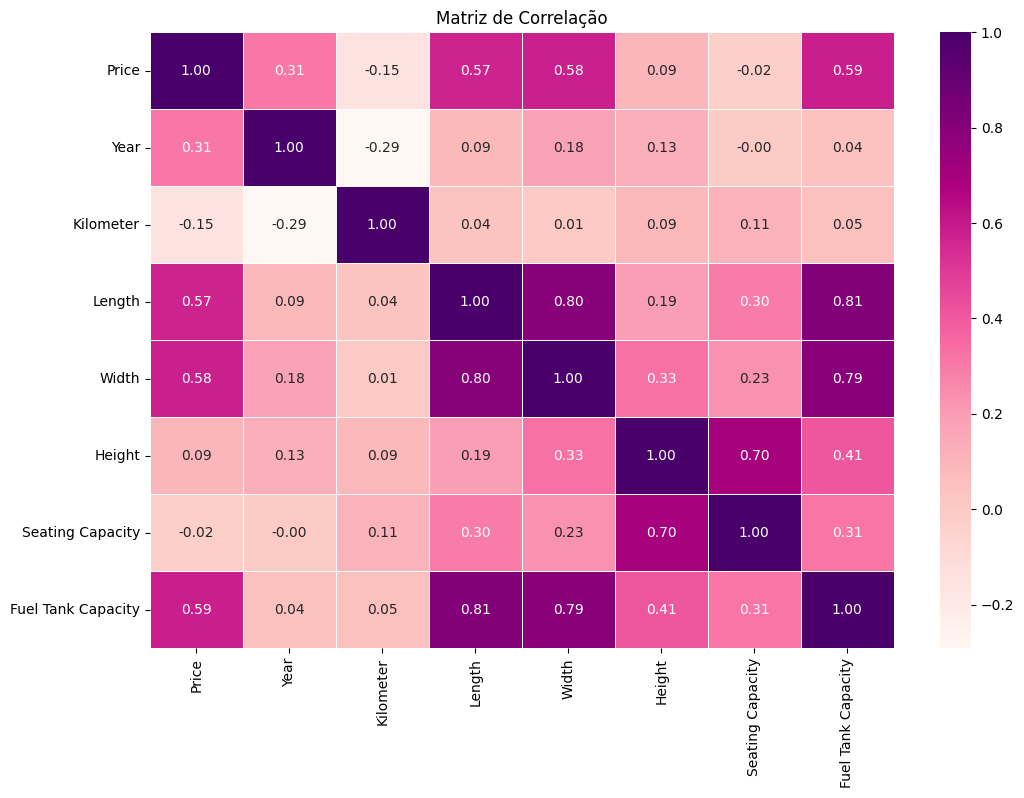

In [ ]:
car_df = df_car.select_dtypes(include=['float64', 'int64'])

corr_car = car_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_car, annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Exemplos de correlações positivas, negativas e neutras:

- **Correlação Positiva**: `Fuel Tank Capacity` e `Price`, se a capacidade do tanque é maior o preço também será;
- **Correlação Neutra**: `Year` e `Seating Capacity`, não existe uma tendência de relação entre essas variaveis;
- **Correlação** **Negativa**: `Kilometer` e `Year`, são relacionadas negativamente.

8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse `Price`.


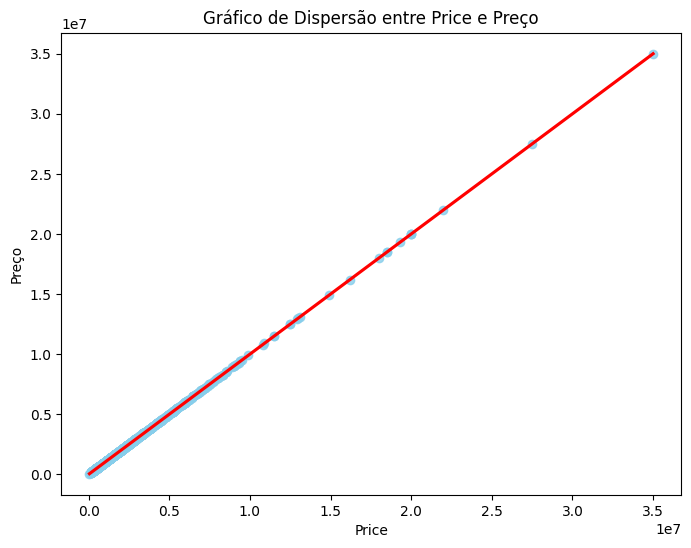

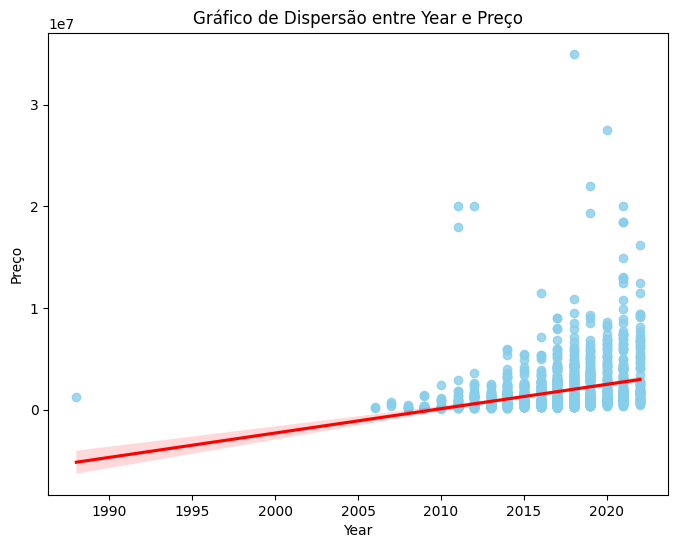

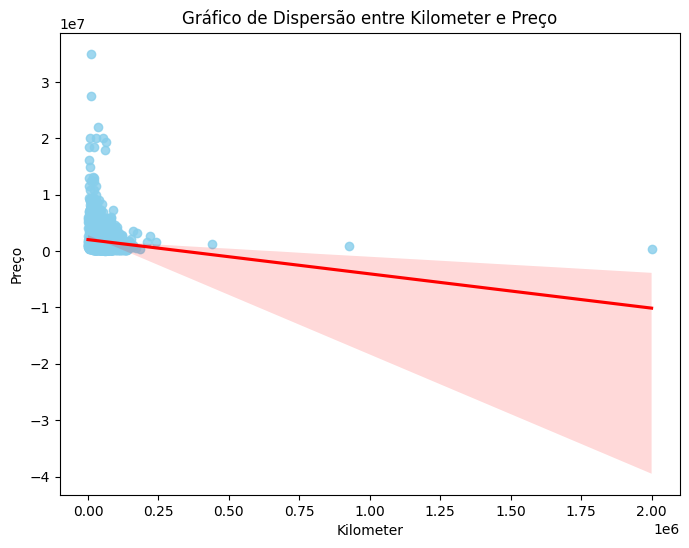

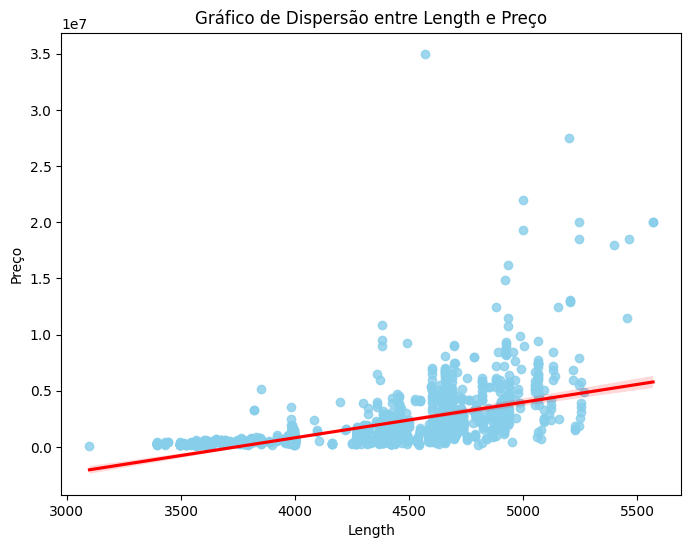

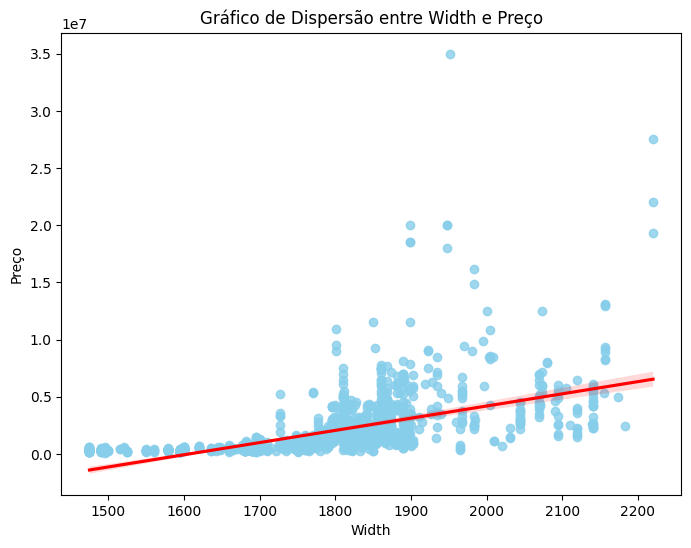

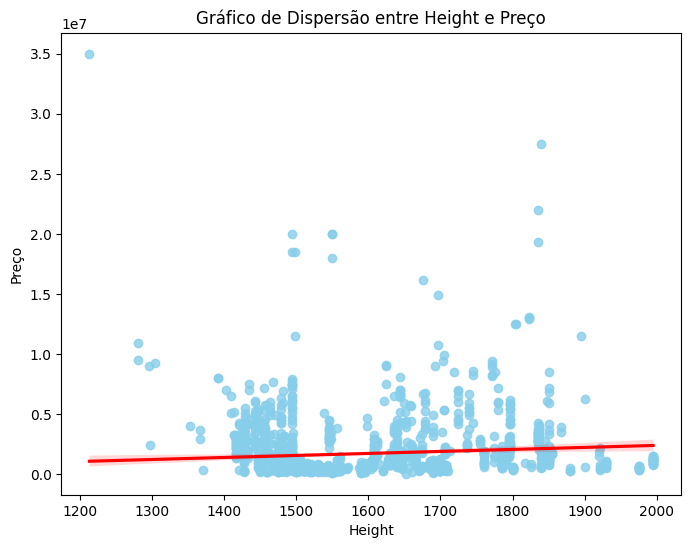

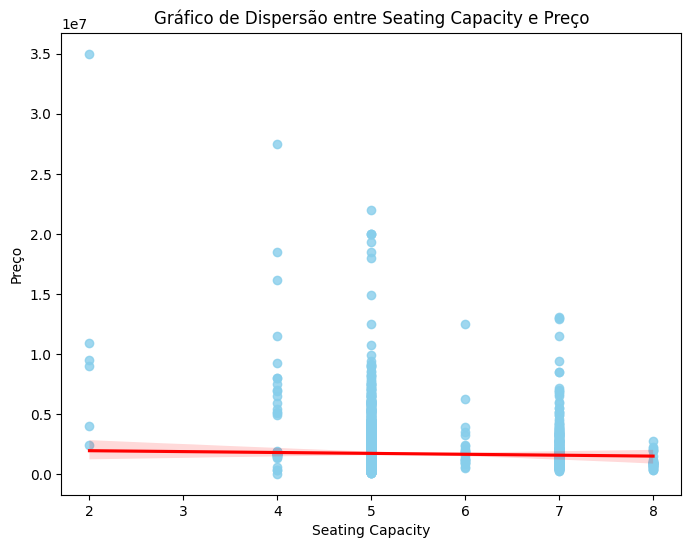

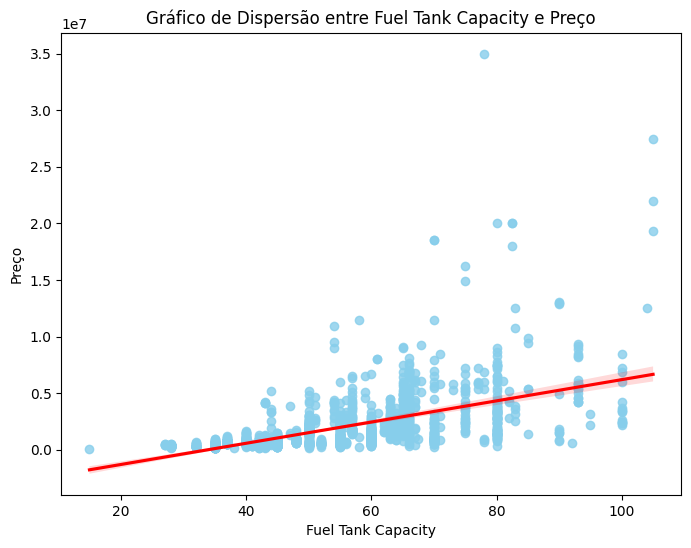

In [ ]:
for i in car_df:
    plt.figure(figsize=(8, 6))
    sns.regplot(data=car_df, x=i, y='Price', color='skyblue', line_kws={'color': 'red'})
    plt.title(f'Gráfico de Dispersão entre {i} e Preço')
    plt.xlabel(i)
    plt.ylabel('Preço')
    plt.show()
    print('\n')

9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.


In [ ]:
df_dummies = pd.get_dummies(car_df).astype(int)
df_dummies.head()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000,2017,87150,3990,1680,1505,5,35
1,450000,2014,75000,3995,1695,1555,5,42
2,220000,2011,67000,3585,1595,1550,5,35
3,799000,2019,37500,3995,1745,1510,5,37
4,1950000,2018,69000,4735,1830,1795,7,55


In [ ]:
X = df_dummies['Year']
y = df_dummies['Price']

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.335
Model:                            OLS   Adj. R-squared (uncentered):              0.334
Method:                 Least Squares   F-statistic:                              941.9
Date:                Tue, 14 May 2024   Prob (F-statistic):                   6.39e-168
Time:                        00:02:28   Log-Likelihood:                         -30209.
No. Observations:                1874   AIC:                                  6.042e+04
Df Residuals:                    1873   BIC:                                  6.043e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

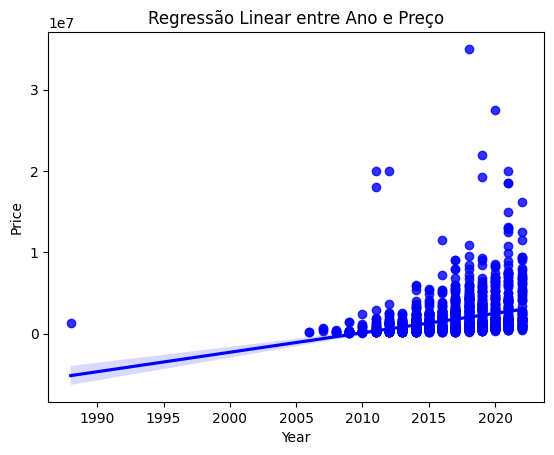

In [ ]:
sns.regplot(x='Year', y='Price', data = df_dummies, color = 'blue')
plt.title('Regressão Linear entre Ano e Preço')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão
Simples.


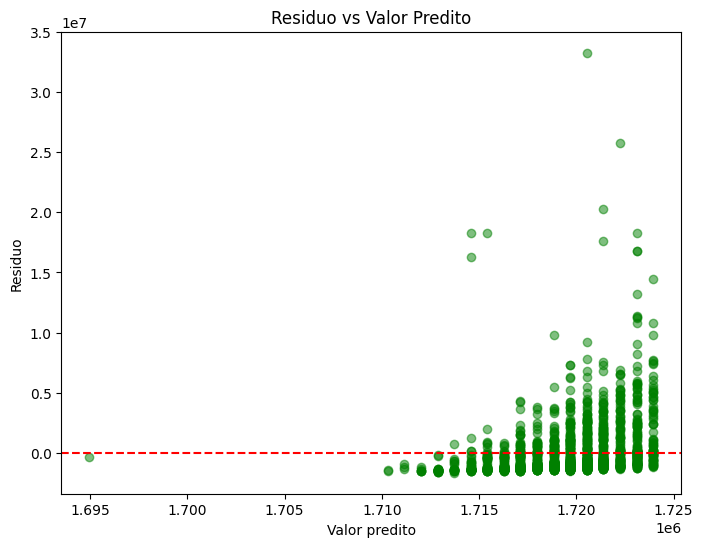

In [ ]:
# salva o dado do resíduo
residuals = model.resid

# calcula o valor predito
predicted_values = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, color = 'green', alpha=0.5)

# adiciona linha
plt.axhline(y=0, color='red', linestyle='--')

# titulos
plt.title('Residuo vs Valor Predito')
plt.xlabel('Valor predito')
plt.ylabel('Residuo')

plt.show()

11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

In [ ]:
X = df_dummies.drop(["Price"], axis=1)
y = df_dummies["Price"]

In [ ]:
final_model = sm.OLS(y, X).fit()
print("Variáveis selecionadas:", list(X.columns))
print("Tabela de Regressao:")
print(final_model.summary())

Variáveis selecionadas: ['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
Tabela de Regressao:
                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.638
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                              470.4
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        00:02:42   Log-Likelihood:                         -29638.
No. Observations:                1874   AIC:                                  5.929e+04
Df Residuals:                    1867   BIC:                                  5.933e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                 

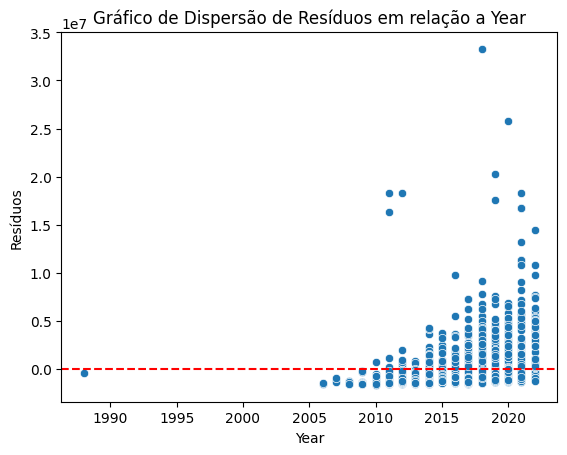

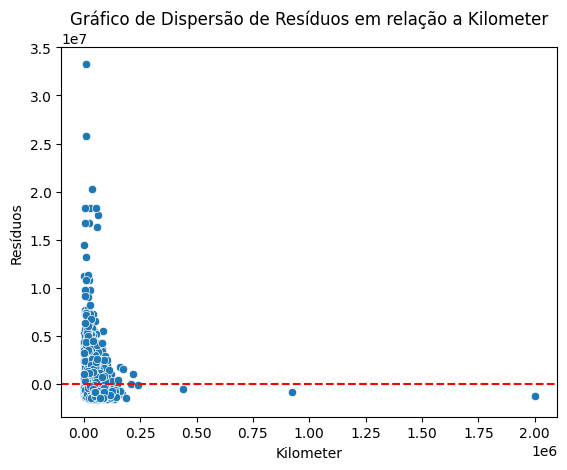

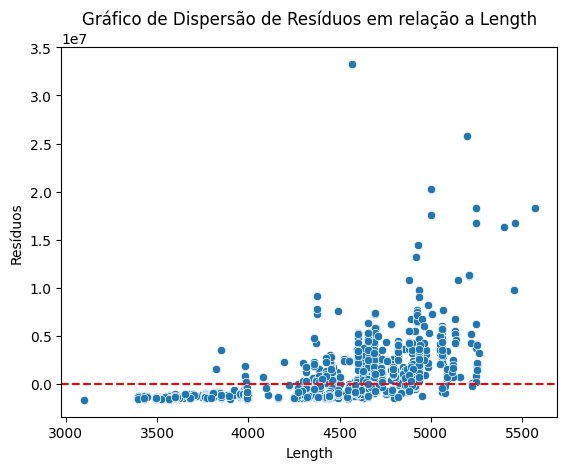

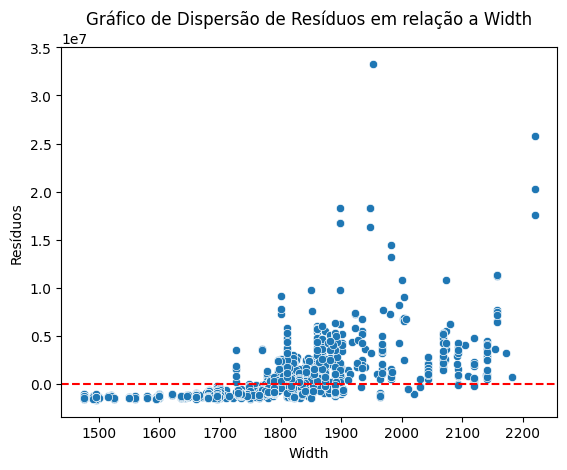

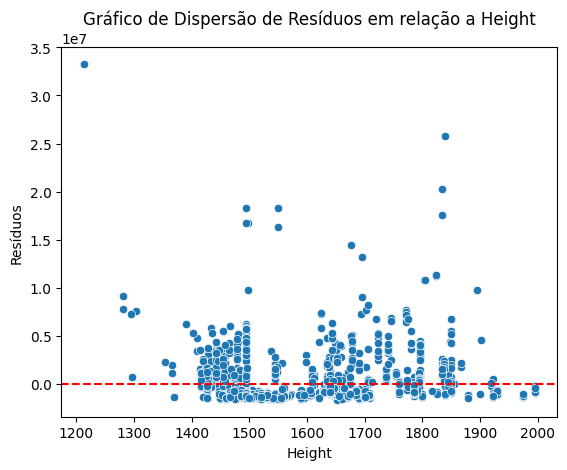

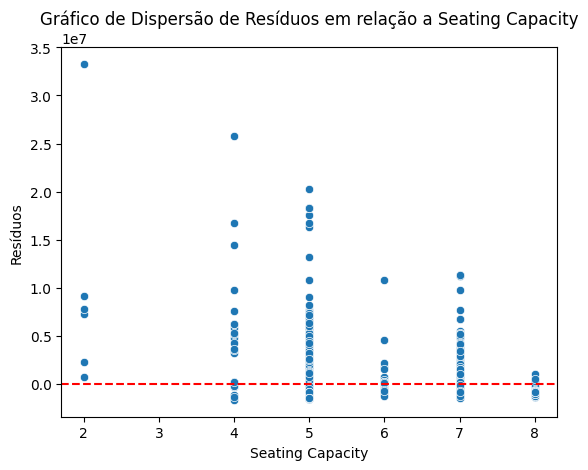

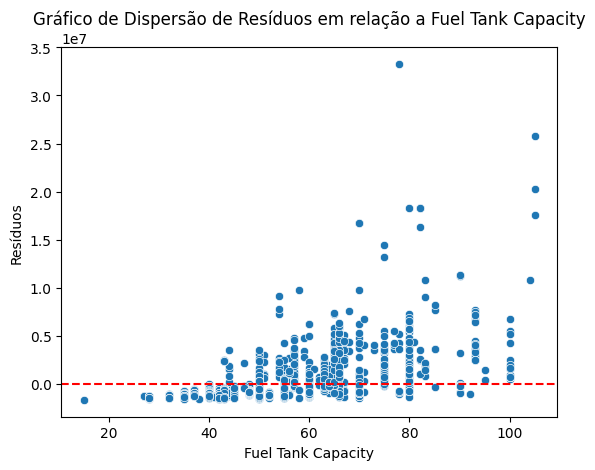

In [ ]:
# Calcular os resíduos
residuos = model.resid

# Criar um DataFrame com os resíduos e as variáveis independentes
residuos_df = pd.DataFrame({'Resíduos': residuos})
residuos_df = pd.concat([residuos_df, X], axis=1)

# Plotar gráficos de dispersão dos resíduos em relação a cada variável independente
for coluna in X.columns:
    sns.scatterplot(x=coluna, y='Resíduos', data=residuos_df)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Gráfico de Dispersão de Resíduos em relação a {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Resíduos')
    plt.show()
    print('\n')